In [170]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture

In [12]:
mu = np.array([[7,6],[0,0],[-1,4],[5,-2]])

In [13]:
cov = []
cov.append([[1,0],[0,25]])
cov.append([[1,0],[0,1]])
cov.append([[9,1],[1,1]])
cov.append([[16,-6],[-6,4]])
cov = np.array(cov)

In [22]:
def generate_samples():
    samples = [[],[],[],[]]
    for i in range(400):
        dist = np.random.choice([0,1,2,3],p=[0.1,0.2,0.5,0.2])
        sample = np.random.multivariate_normal(mu[dist], cov[dist])
        samples[dist].append(sample)
    return samples

In [ ]:
samples = generate_samples()

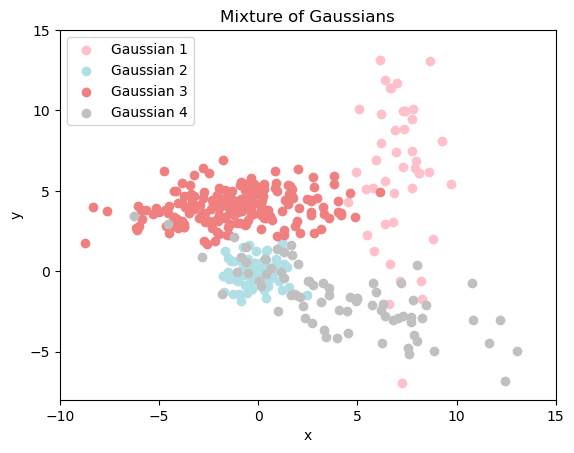

In [221]:

color = ['red','orange','green','blue']
color = ['pink','powderblue','lightcoral','silver']
#color = ['lightcoral','powderblue','lightgrey','pink']

for i in range(4):
    x = [s[0] for s in samples[i]]
    y = [s[1] for s in samples[i]]
    plt.scatter(x,y,color = color[i],label = "Gaussian "+str(i+1))
    
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mixture of Gaussians")
plt.xlim(-10, 15) 
plt.ylim(-8, 15) 

plt.show()

In [216]:
def elp(mu,cov):
    eigvals, eigvecs = np.linalg.eigh(cov)
    direction = eigvecs[0] / np.linalg.norm(eigvecs[0])
    theta = np.arctan2(direction[1], direction[0]) * 180 / np.pi + 180
    stretch = 2.0 * np.sqrt(3.0 * eigvals)
    ellipse = Ellipse(mu, stretch[0], stretch[1], angle=theta, color='red')
    ellipse.set_alpha(0.25)
    return ellipse

In [217]:
all_samp = samples[0] + samples[1] + samples[2] + samples[3]
x = [s[0] for s in all_samp]
y = [s[1] for s in all_samp]

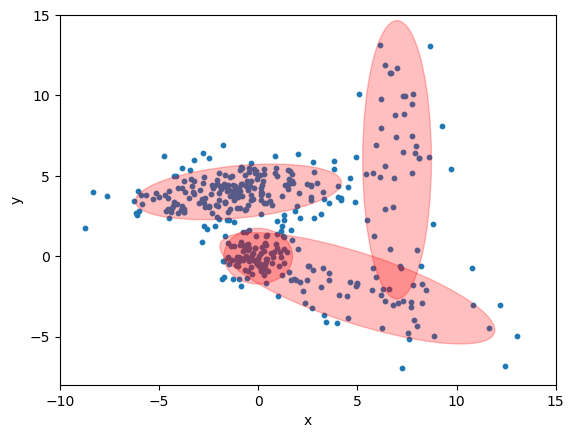

In [218]:
ells = [elp(mu[i],cov[i]) for i in range(4)] 
  
fig, ax = plt.subplots() 
ax.scatter(x,y,s=10)
for e in ells: 
    ax.add_artist(e) 
    #e.set_clip_box(ax.bbox) 
    e.set_alpha(0.25) 
    #e.set_facecolor(np.random.rand(4))
#     e.set_facecolor('blue')

ax.set_xlim(-10, 15) 
ax.set_ylim(-8, 15) 
plt.xlabel('x')
plt.ylabel('y')
  
# 

  
plt.show()

In [184]:
gm = GaussianMixture(n_components=4, random_state=1,init_params='random_from_data')
gm.fit(all_samp)

GaussianMixture(init_params='random_from_data', n_components=4, random_state=1)

In [185]:
mu_em = gm.means_
cov_em = gm.covariances_

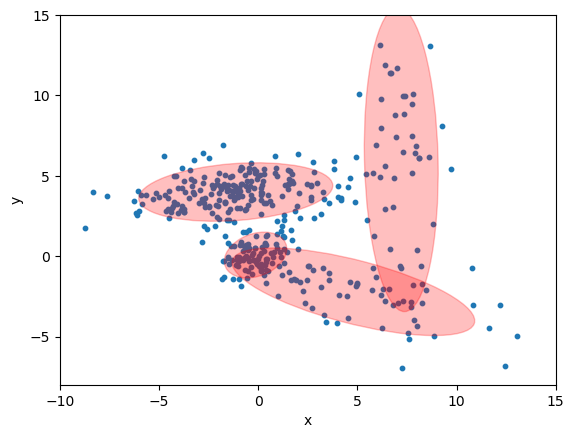

In [203]:
ells = [elp(mu_em[i],cov_em[i]) for i in range(4)] 
  
fig, ax = plt.subplots() 
ax.scatter(x,y,s=10)
for e in ells: 
    ax.add_artist(e) 
    e.set_alpha(0.25) 
#     e.set_facecolor('blue')

ax.set_xlim(-10, 15) 
ax.set_ylim(-8, 15) 

plt.xlabel('x')
plt.ylabel('y')
  
# 

  
plt.show()

In [188]:
pred = gm.predict(all_samp)

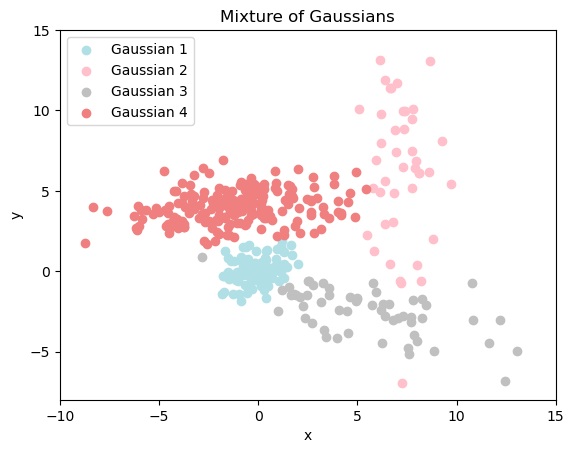

In [222]:
color = ['pink','powderblue','lightcoral','silver']
color = ['powderblue','pink','silver','lightcoral']
x = []
y = []
for i in range(4):
    sp = [s for s in all_samp if gm.predict([s])==i]
    #print(sp)
    x = [s[0] for s in sp]
    y = [s[1] for s in sp]
    c = color[i]#[color[pred[i]] for i in range(len(all_samp))]

    plt.scatter(x,y,color = c,label = "Gaussian "+str(i+1))
    
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mixture of Gaussians")
plt.xlim(-10, 15) 
plt.ylim(-8, 15) 

plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


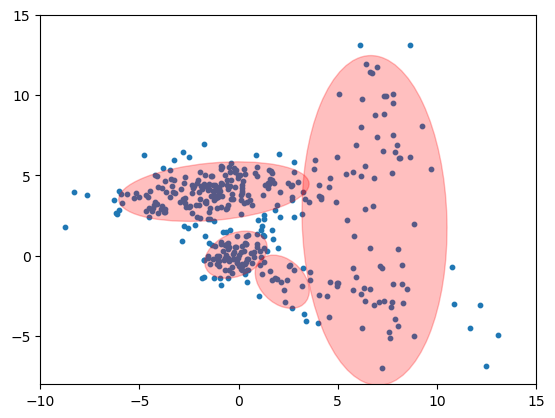

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


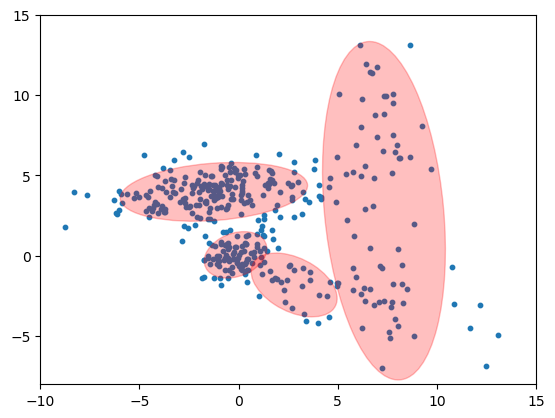

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


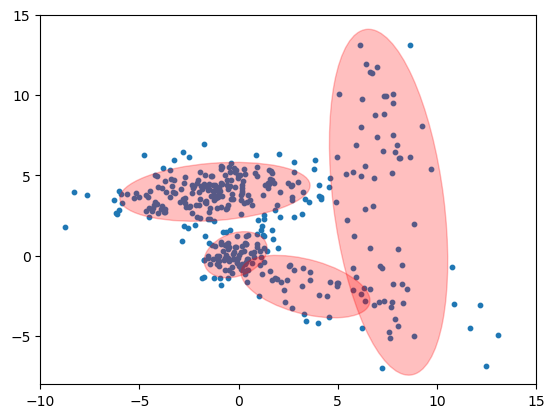

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


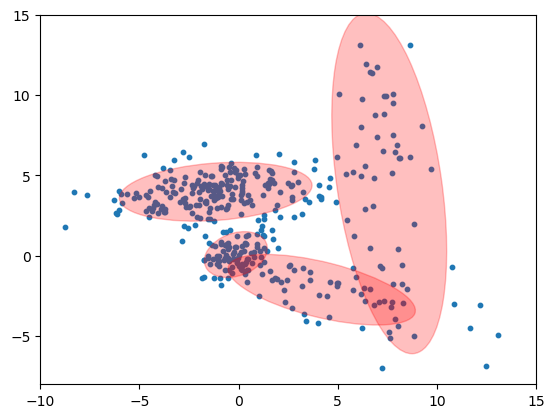

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


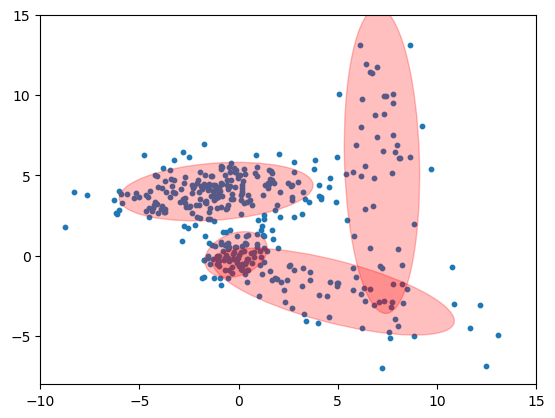

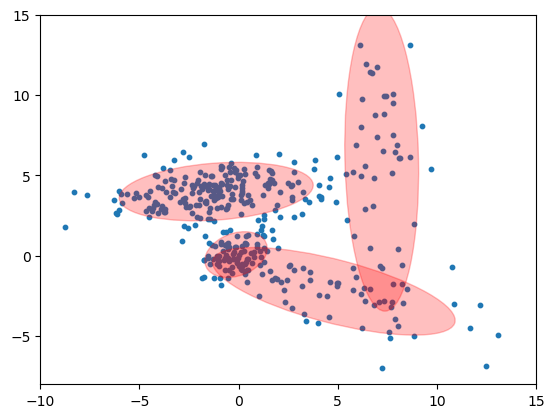

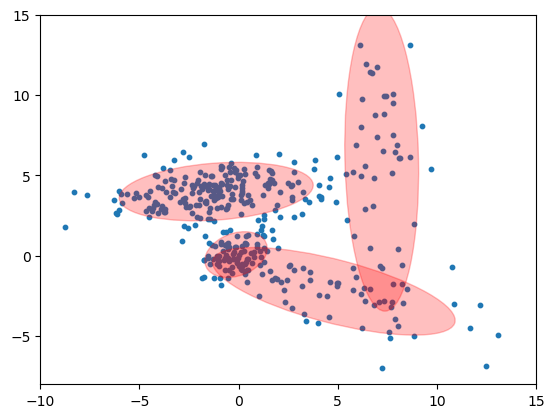

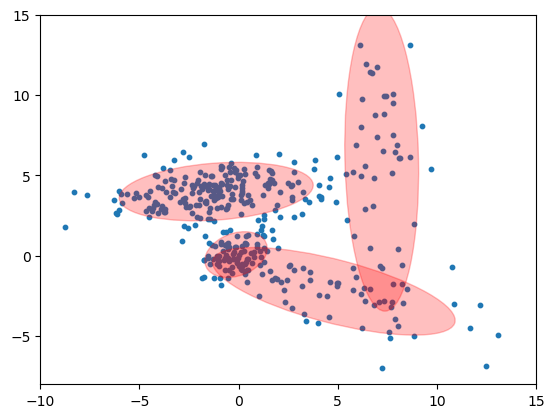

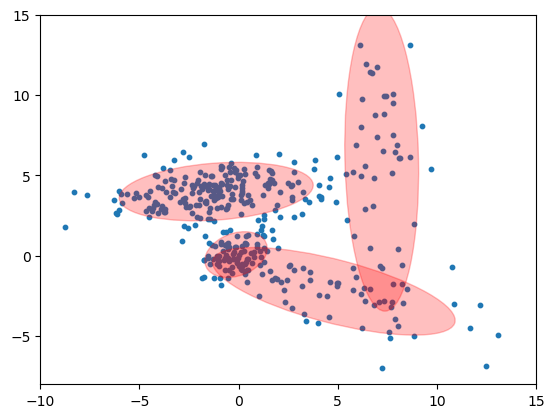

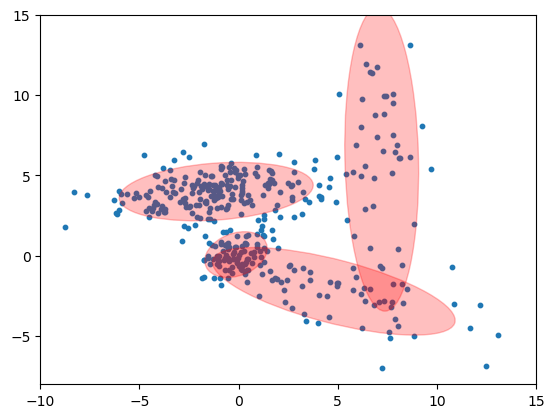

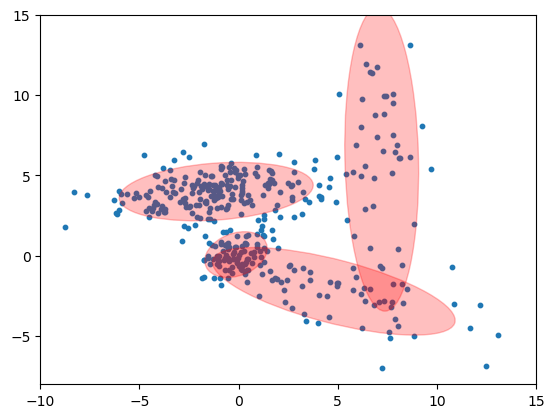

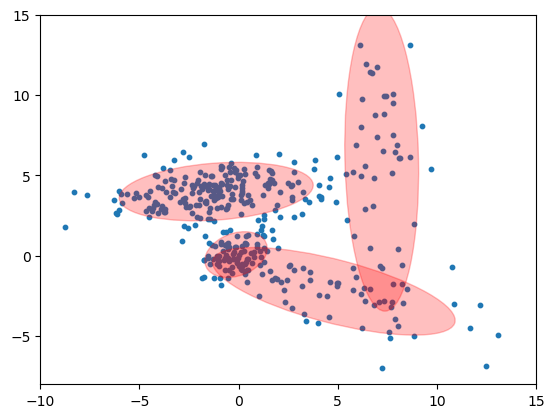

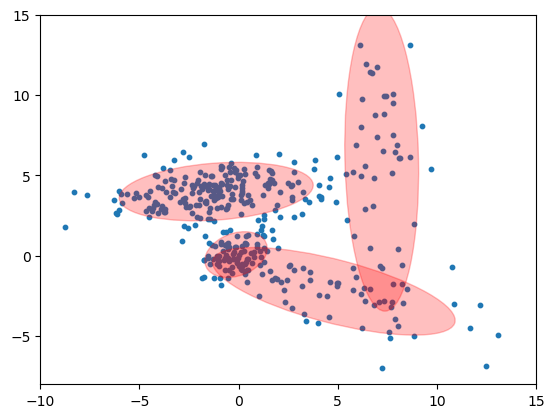

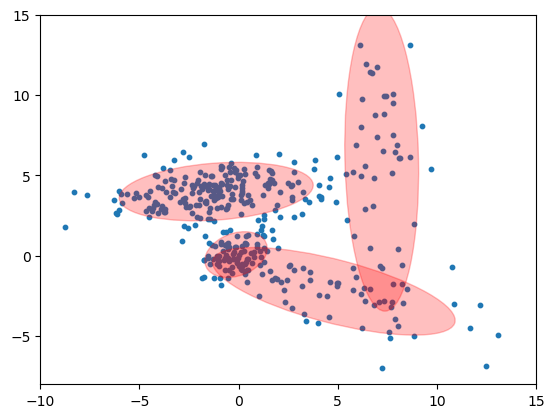

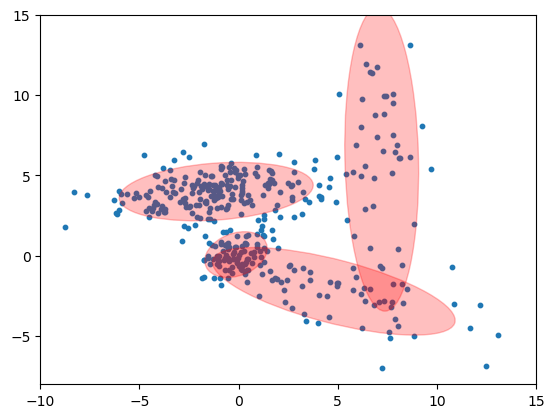

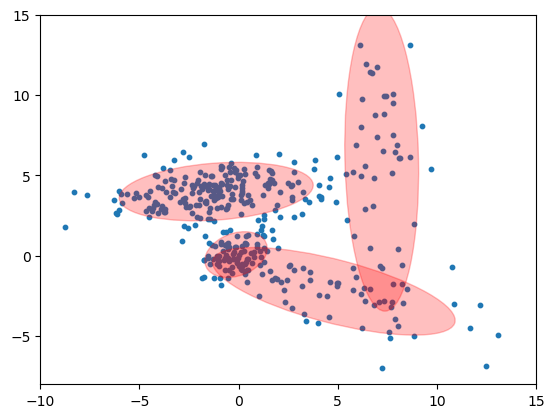

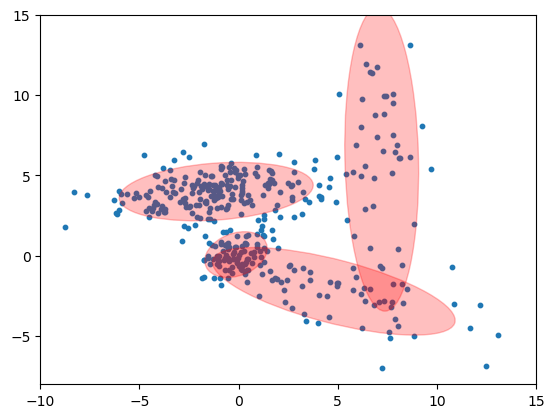

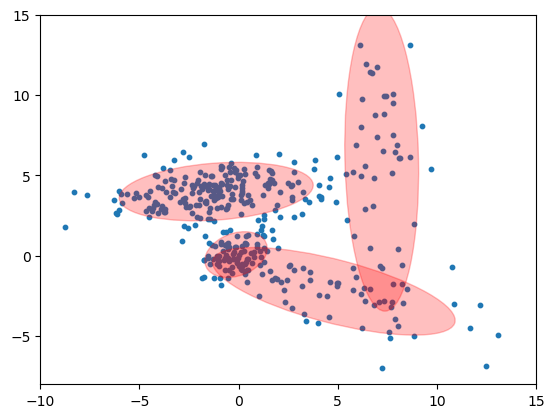

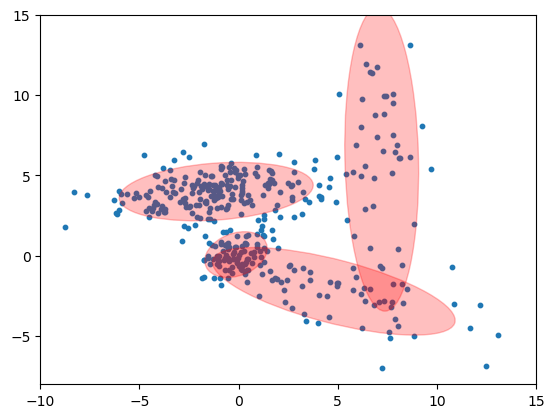

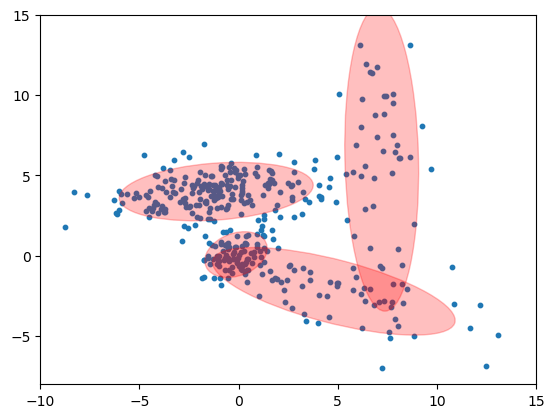

In [198]:
for i in range(5,105,5):
    gm = GaussianMixture(n_components=4, random_state=1,init_params='random_from_data',max_iter=i)
    gm.fit(all_samp)
    mu_em = gm.means_
    cov_em = gm.covariances_
    if(i%5==0):
        ells = [elp(mu_em[i],cov_em[i]) for i in range(4)] 
  
        fig, ax = plt.subplots() 
        ax.scatter(x,y,s=10)
        for e in ells: 
            ax.add_artist(e) 
            e.set_alpha(0.25) 
        #     e.set_facecolor('blue')

        ax.set_xlim(-10, 15) 
        ax.set_ylim(-8, 15) 


        # 


        plt.show()